# Exercise 1 - Data preperation

## Q1.1 Load the dataset


Visualized for better readability:


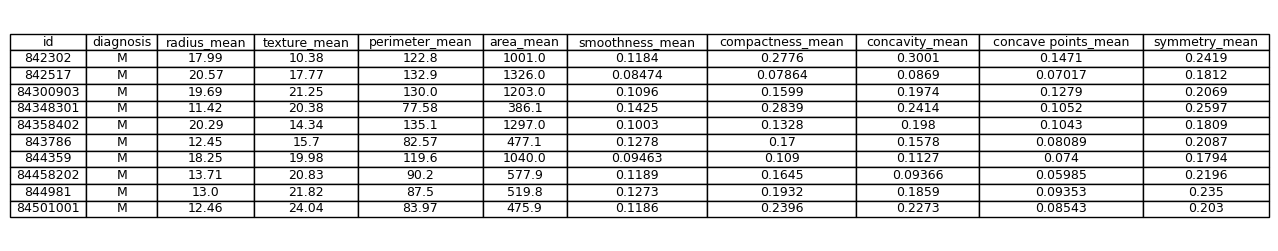

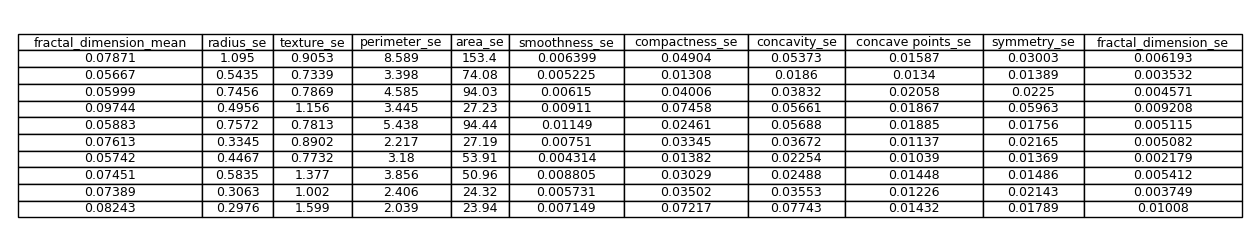

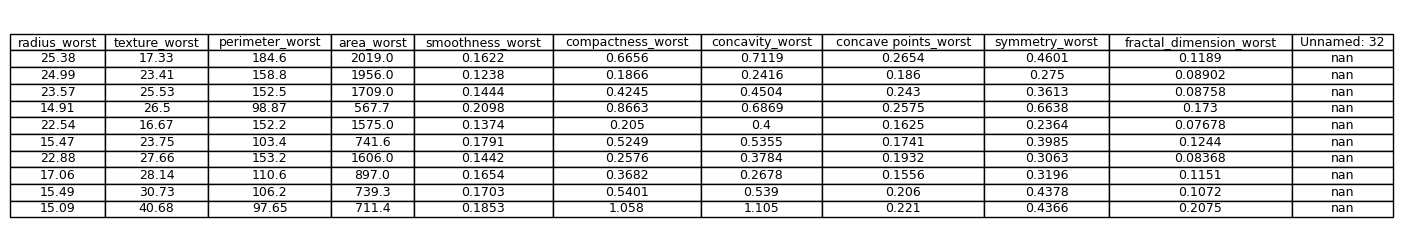

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../archive/data.csv")

sample = df.head(10)  # change number to see more rows

num_splits = 3  # splitting the image so i can actually read the thing. 
columns_split = np.array_split(sample.columns, num_splits)

print("Visualized for better readability:")

for i, cols in enumerate(columns_split, start=1):
    fig, ax = plt.subplots(figsize=(16, 3))  # wider 
    ax.axis("off")
    
    table = ax.table(
        cellText=sample[cols].values,
        colLabels=cols,
        cellLoc='center',
        loc='center'
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.auto_set_column_width(col=list(range(len(cols))))
    
    #plt.tight_layout()
    plt.show()



I have limited the output to only include 10 rather than the whole 569 entries (looked at the csv file). As we can see all the entries included above have the diagnosis 'M' meaning malignant as the diagnosis of breast tissues (based on documentation here https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

When looking purely at this snippet of the dataset you would get the wrong intention of the whole dataset seeing how on kaggle its shown that benign diagnosis make up 63% of the diagnosis whilst magilant only makes up the remainer 37%.

![Bias in Breast Cancer Dataset](bias_breastcancer.PNG)



## Q1.2 Dataset split and standarization
First before training on anything we have to split the data into training, validation and test sets. This split will be 60% training, 20% validation, 20% test.

To do this we first split the set in 60 (training) / 40. 

The 40 then will be split 20/20 for validation and test 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore') # Dont need ids for this.

X = df.drop(columns=['diagnosis']) # As we've seen from Q1.1 diagnosis are M or B
y = df['diagnosis'].map({'M':1, 'B':0})  # M -> 1, B -> 0

# Check target distribution
print("Target distribution (proportion):")
print(y.value_counts(normalize=True))

# 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y # 42 meaning of life or something like that :P
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("\nDataset sizes: (Amount of data samples per set)")
print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

# Standardization
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_std = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


Target distribution (proportion):
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

Dataset sizes: (Amount of data samples per set)
Training: (341, 30)
Validation: (114, 30)
Test: (114, 30)


The data above is relfected with the same percentage that came from kaggle, 62% B (0) and 37% M (1)

### Non standardized plot (raw data)

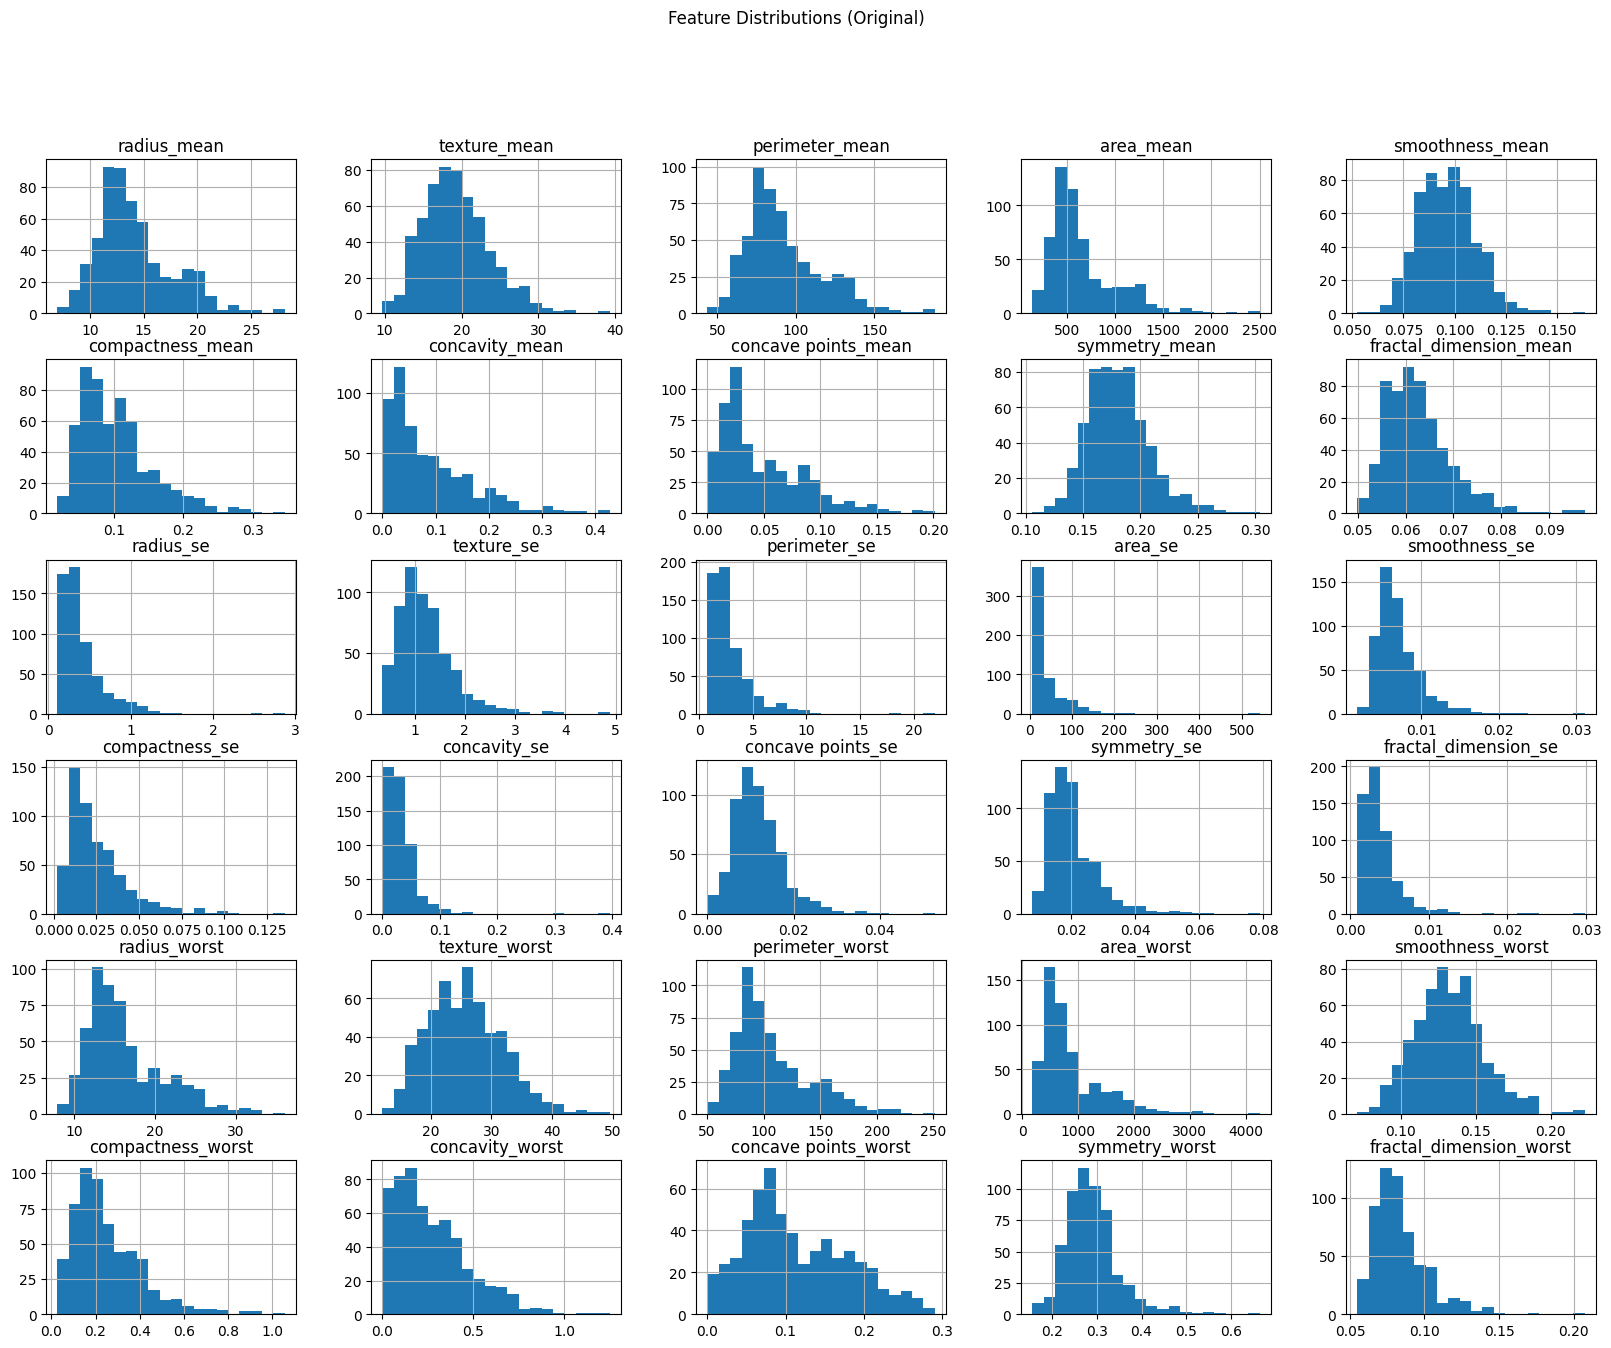

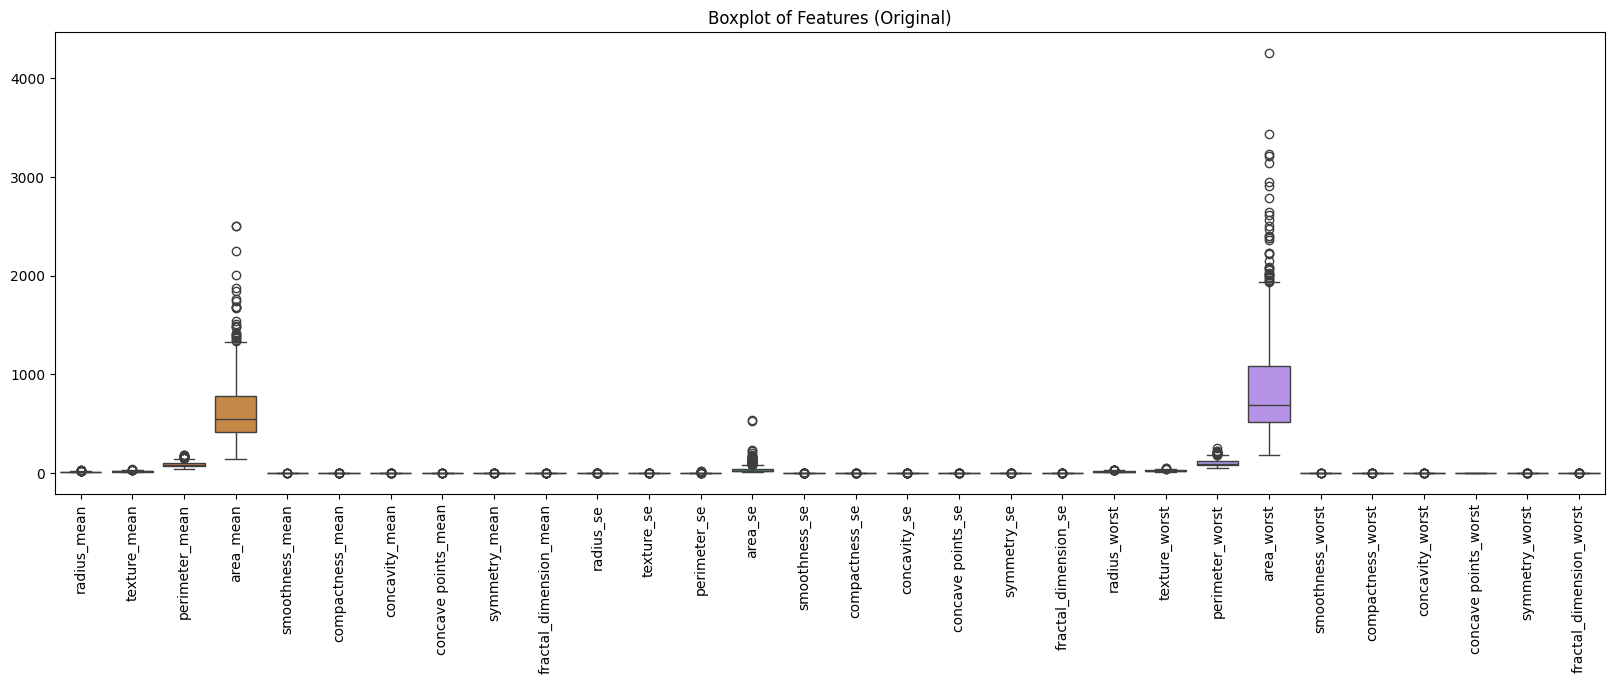

In [64]:
# Plot histograms for all features before standardization
X.hist(bins=20, figsize=(20,15))
plt.suptitle("Feature Distributions (Original)")
plt.show()

# Boxplots for spotting outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Original)")
plt.show()


Looking at the boxplot, it doesn’t make sense to compare all the features this way because some features, like area, have values in the 4000+ range, while most other features are around 100–250 at most.

Histograms, on the other hand, are a better visualization since each plot represents a single feature independently. 

### Standarized plot

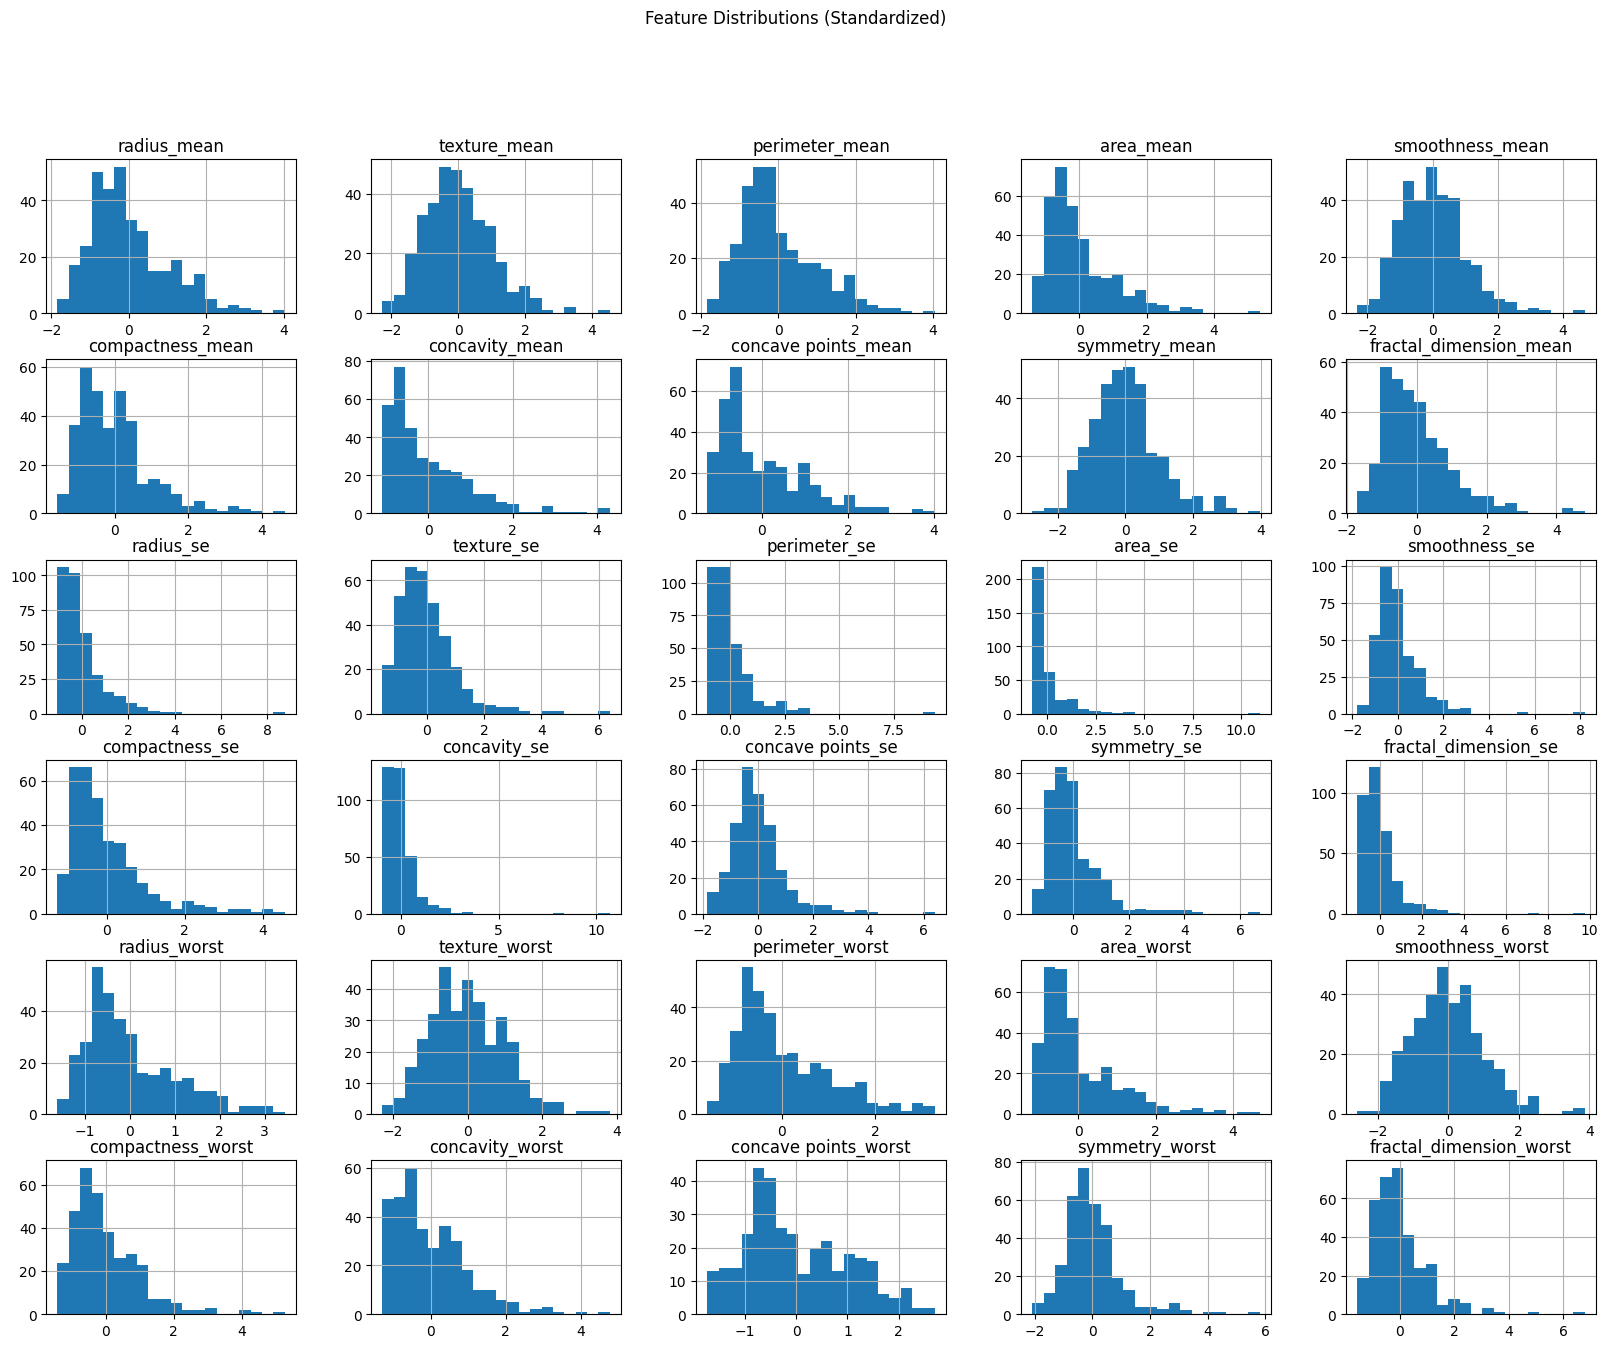

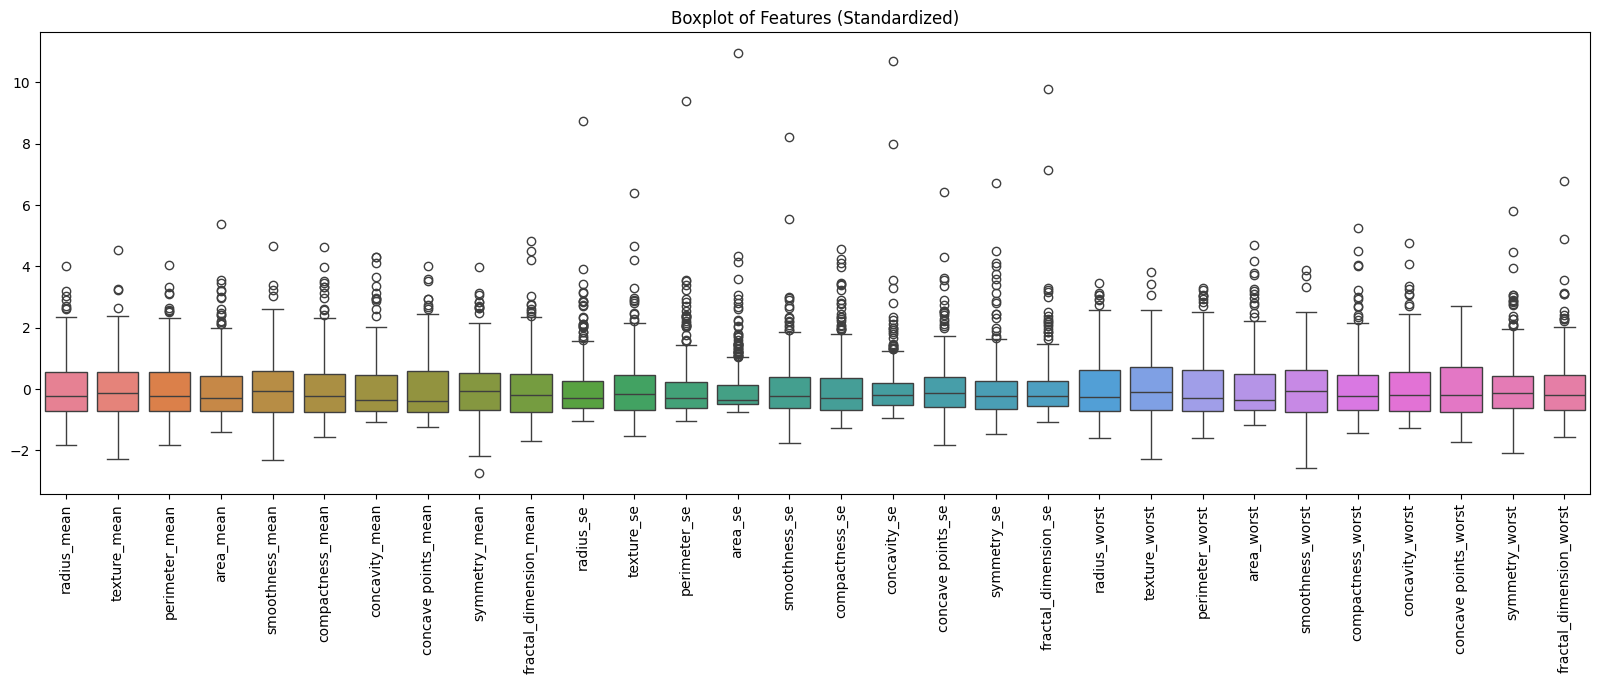

In [67]:
# Plot histograms for all features after standardization
X_train_std.hist(bins=20, figsize=(20,15))
plt.suptitle("Feature Distributions (Standardized)")
plt.show()

# Boxplots after standardization
plt.figure(figsize=(20,6))
sns.boxplot(data=X_train_std)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Standardized)")
plt.show()


This boxplot, on the other hand, is much more digestible and easier to read. Standardization ensures that all features are on the same scale, this stops features with larger numeric ranges from dominating the analysis and makes it so we can actually compare the features

The histogram on the other hand now doesn't use the actual values for the x-axis. It ineasted uses the  standardized scores (z-scores)

If we were to use the original features, the boxplot would be misleading because features with large numeric ranges (like area) would dominate the visualization, making it hard to interpret differences between features. The histograms would still show each feature individually, but comparing distributions across features would be difficult due to the different scales.

By using standardized features, the boxplot becomes much more simpler, as all features are on the same scale. This allows us to directly compare the spread and detect outliers more effectively. Histograms now show z-scores on the x-axis instead of the original values, which standardizes the scale but keeps the shape of each feature’s distribution.

I would personally say that the standardized features are more suitable for to work with in cases such as this where there are some features that have drastically different scales to work with

## Q1.3 - Why do we split the set?
As seen in Q1.2 we split the dataset in 3 ways. Training, validation and test sets.

We split the dataset into training, validation, and test sets. The training set (60%) is used to teach the model, the validation set (20%) is used to fine-tune hyperparameters, and the test set (20%) evaluates the model on unseen data to check its generalization.

- Training is needed to actually base the model on some data. Model sees examples and adjust parameters to fit patterns in the data. Since the training bolk is what the model is actually based on, it is marginally larger than the other sets (60/20/20)

- Validation is for after training, we use it to tune the model, like if the model has hyperparameter (like learningrate) or regularzation strength 

- To check if the model is actually correct we need to test it on data on a clean slate that it isnt shown before. So it will tell us how the model would preform on real world data.

